In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 加载MNIST数据集
mnist = fetch_openml('mnist_784')
# 获取MNIST数据集的图像和标签
X = mnist.data / 255.0
y = mnist.target# 输出数据集的形状
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (70000, 784)
y shape: (70000,)


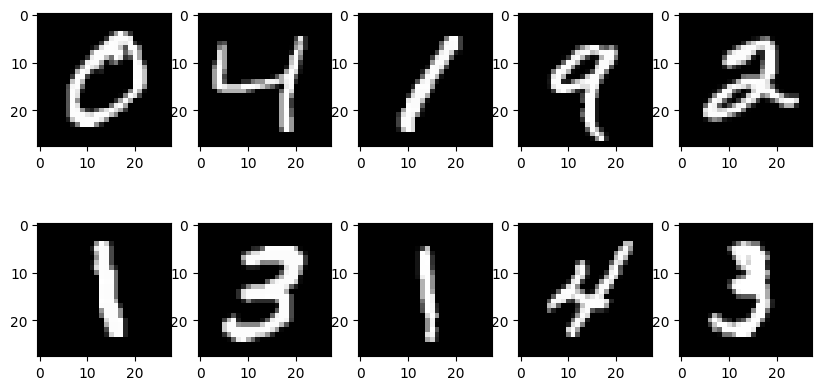

In [3]:
plt.figure(figsize=(10, 5))
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
plt.savefig('图7.jpg')
plt.show()

In [4]:
x_train, x_test, y_train, y_test = \
            train_test_split(X, y, train_size=6/7, random_state=42)  #数据集划分

In [5]:
def PCA(X, threshold):
    X_centered = X - np.mean(X, axis=0,dtype='float64') # 对数据进行中心化处理
    cov = np.dot(X_centered.T, X_centered) / (X.shape[0] - 1) # 计算数据的协方差矩阵
    eigen_values, eigen_vectors = np.linalg.eig(cov) # 对协方差矩阵进行特征值分解，得到特征值和特征向量
    # 对特征值进行排序
    idx = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    # 计算每个主成分的方差贡献率，并对其进行累加
    var_contrib = eigen_values / np.sum(eigen_values)
    cum_var_contrib = np.cumsum(var_contrib)
    # 选取方差贡献率大于等于阈值的主成分
    k = np.argmax(cum_var_contrib >= threshold) + 1
    P = eigen_vectors[:, :k] #784 * 59
    # 将数据矩阵 X 乘以投影矩阵 P，得到降维后的数据矩阵 Y
    Y = np.dot(X_centered, P) #60000 * 59
    return Y, P

Y, P = PCA(x_train, threshold=0.85) # 调用PCA函数，保留累计方差贡献率大于等于85%

# 将降维后的数据矩阵乘以投影矩阵 P 的转置加上数据矩阵的均值，得到还原后的数据矩阵 X_reconstructed
X_reconstructed = np.dot(Y, P.T) + np.mean(x_train, axis=0,dtype='float64')

# 输出结果
print("原始数据矩阵 X：")
print(x_train.shape)
print("降维后的数据矩阵 Y：")
print(Y.shape)
print("还原后的数据矩阵 X_reconstructed：")
print(X_reconstructed.shape)

原始数据矩阵 X：
(60000, 784)
降维后的数据矩阵 Y：
(60000, 59)
还原后的数据矩阵 X_reconstructed：
(60000, 784)


In [6]:
def PCA(X, threshold):
    X_centered = X - np.mean(X, axis=0, dtype='float64')  # 对数据进行中心化处理
    cov = np.dot(X_centered.T, X_centered) / (X.shape[0] - 1)  # 计算数据的协方差矩阵
    eigen_values, eigen_vectors = np.linalg.eig(cov)  # 对协方差矩阵进行特征值分解，得到特征值和特征向量
    # 对特征值进行排序
    idx = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    # 计算每个主成分的方差贡献率，并对其进行累加
    var_contrib = eigen_values / np.sum(eigen_values)
    cum_var_contrib = np.cumsum(var_contrib)
    # 选取方差贡献率大于等于阈值的主成分
    k = np.argmax(cum_var_contrib >= threshold) + 1
    P = eigen_vectors[:, :k]  # 投影矩阵 P
    loadings = P * np.sqrt(eigen_values[:k])  # 计算因子负荷量

    # 将数据矩阵 X 乘以投影矩阵 P，得到降维后的数据矩阵 Y
    Y = np.dot(X_centered, P)  # 降维后的数据矩阵

    return Y, P, loadings


Y, P, loadings = PCA(x_train, threshold=0.85)  # 调用PCA函数，保留累计方差贡献率大于等于85%

# 输出结果
print("原始数据矩阵 X：")
print(x_train.shape)
print("降维后的数据矩阵 Y：")
print(Y.shape)
print("投影矩阵 P：")
print(P.shape)
print("因子负荷量 Loadings：")
print(loadings.shape)
print("还原后的数据矩阵 X_reconstructed：")
print(X_reconstructed.shape)

In [ ]:
np.set_printoptions(threshold=np.inf)
loadings

array([[ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
      

In [ ]:
Y.shape, P.shape

((60000, 59), (784, 59))

In [ ]:
def k_means_clustering(data, k, initial_centroids):
    # 将初始聚类中心设置为当前聚类中心
    centroids = initial_centroids
    J_list = []
    # 迭代直到收敛
    # 计算目标函数J
    
    while True:
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2)) # 计算每个点到所有聚类中心的距离
        labels = np.argmin(distances, axis=0) # 将每个点分配到最近的聚类中心
        J = np.zeros(k)
        for i in range(k):
            J[i] = np.sum(np.sqrt(((data[labels == i] - centroids[i])**2).sum(axis=1)))
        J_list.append(sum(J))
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)]) # 计算新的聚类中心
        # if np.all(centroids == new_centroids):  # 如果聚类中心不再改变，则停止迭代
        # break       
        if len(J_list) >= 2 and J_list[-1] == J_list[-2]:  # 如果J值不再改变，则停止迭代
            break
        centroids = new_centroids
      
    return labels, centroids, J


In [ ]:
# 生成数据集
np.random.seed(42)
X_pca_train = Y
# 设置聚类中心数量和初始聚类中心
K = 1
initial_centroids = np.array([X_pca_train[1]])
labels, centroids, J = k_means_clustering(X_pca_train, K, initial_centroids)

# 打印结果
print("聚类标签：", labels)
print("聚类中心：", centroids)

聚类标签： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

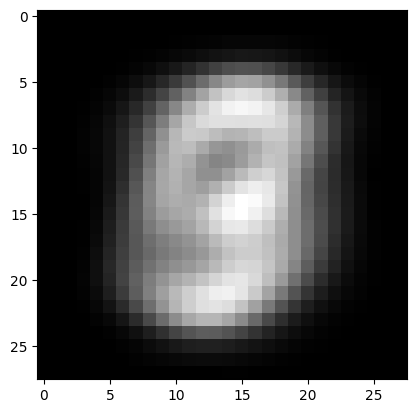

In [ ]:
X_reconstructed = np.dot(centroids[0].reshape(1,-1), P.T) + np.mean(x_train, axis=0)
plt.imshow(X_reconstructed.reshape(28, 28).astype('float64'), cmap='gray')
plt.show() 

In [ ]:
J

array([397904.98740167])

In [ ]:
# 生成数据集
np.random.seed(42)
X_pca_train = Y
# 设置聚类中心数量和初始聚类中心
K = 2
initial_centroids = np.array([X_pca_train[1],X_pca_train[3]])
labels, centroids, J = k_means_clustering(X_pca_train, K, initial_centroids)

# 打印结果
print("聚类标签：", labels)
print("聚类中心：", centroids)

聚类标签： [0 1 0 ... 1 0 0]
聚类中心： [[-2.16368241e+00 -8.36363324e-01 -1.32127187e-01 -2.41518110e-01
  -1.40265758e-01  9.45380746e-02  6.35720499e-02 -6.24380386e-02
   5.34478239e-02  1.11380765e-01  1.08639175e-02 -5.18748550e-03
   3.55429723e-02 -3.29296785e-02  2.88351647e-02  6.83614612e-02
  -1.90710570e-02 -1.45377576e-02 -2.02297801e-02  2.96213627e-02
  -8.40631443e-04  2.68154102e-02  2.86337636e-02  5.85698216e-03
  -4.79702883e-02  2.29200374e-02  5.52507155e-03 -9.39492055e-03
  -9.52121936e-03  6.79701062e-03 -9.02330541e-03 -7.41289883e-04
   1.51130506e-03 -6.89447409e-03 -8.86299059e-04 -3.50723674e-03
   1.39849048e-02  2.68745606e-03  6.05348680e-03 -2.92826012e-03
  -9.61431706e-03  4.70769535e-03 -3.07980266e-03  1.88346715e-03
  -3.30124813e-03  1.72058802e-02 -7.60716899e-03 -2.08715448e-02
  -4.97949983e-04  3.79018737e-03  1.09543148e-02 -2.91210516e-03
   8.73970343e-04  4.57527407e-03 -6.60702272e-03  5.05809222e-03
   7.51215969e-03  3.27069650e-03  9.58656715e

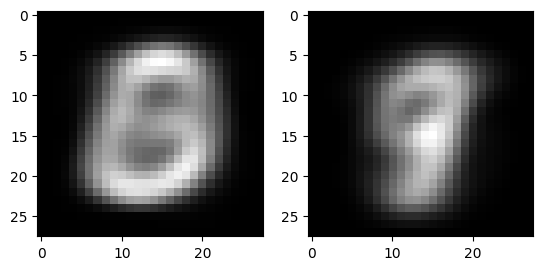

In [ ]:
fig, axes = plt.subplots(1, 2)  # 创建一行两列的子图

for i, ax in enumerate(axes):
    X_reconstructed = np.dot(centroids[i].reshape(1, -1), P.T) + np.mean(x_train, axis=0)
    ax.imshow(X_reconstructed.reshape(28, 28).astype('float64'), cmap='gray')

plt.show()

In [ ]:
J

array([161668.34597929, 220865.34969399])

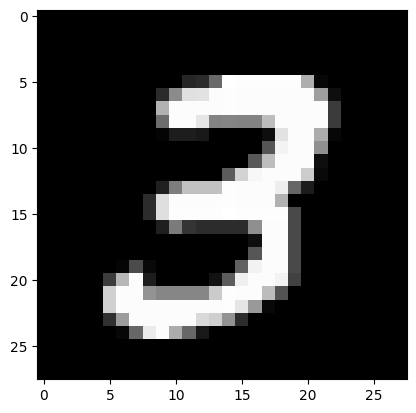

In [ ]:
plt.imshow(X[7].reshape(28, 28), cmap='gray')
plt.show()

In [ ]:
def k_means_clustering(data, k, initial_centroids, max_iterations):
    # 将初始聚类中心设置为当前聚类中心
    centroids = initial_centroids
    J_list = []
    J = np.zeros(k)

    # 迭代直到收敛或达到最大迭代次数
    for iteration in range(max_iterations):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))  # 计算每个点到所有聚类中心的距离
        labels = np.argmin(distances, axis=0)  # 将每个点分配到最近的聚类中心
        
        for i in range(k):
            J[i] = np.sum(((data[labels == i] - centroids[i])**2).sum(axis=1))  # 计算每个聚类的目标函数值
        
        J_list.append(np.sum(J))
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])  # 计算新的聚类中心
        
#         if len(J_list) >= 2 and J_list[-1] == J_list[-2]:  # 如果J值不再改变，则停止迭代
#             break
        centroids = new_centroids
        
    return labels, centroids, J_list


In [ ]:
# 生成数据集
np.random.seed(42)
X_pca_train = Y
# 设置聚类中心数量和初始聚类中心
K = 10 #0-5  1-4 2-1 3-9 4-2 6-3 -1-6 300-8 654-7
initial_centroids = np.array([X_pca_train[1],X_pca_train[3],X_pca_train[5],X_pca_train[7],X_pca_train[2],X_pca_train[0],X_pca_train[-1],X_pca_train[654],X_pca_train[300],X_pca_train[4]])
labels, centroids, J = k_means_clustering(X_pca_train, K, initial_centroids,20)

# 打印结果
print("聚类标签：", labels)
print("聚类中心：", centroids)

聚类标签： [5 0 9 1 9 2 0 3 8 7 7 3 1 7 0 1 9 0 8 3 7 0 7 1 2 2 0 1 7 3 0 0 9 3 3 5 7
 1 1 1 0 1 7 7 7 9 1 5 7 1 4 4 4 1 7 1 7 9 4 4 1 7 1 1 7 1 8 7 3 7 1 5 7 6
 7 7 7 5 8 9 5 8 1 1 8 4 0 0 4 1 1 6 7 1 2 7 1 3 0 1 1 5 2 7 9 1 7 0 1 4 1
 4 1 7 8 4 0 1 8 4 3 8 4 4 6 0 0 7 7 2 7 8 9 0 3 8 2 0 1 4 1 7 4 7 1 0 5 6
 7 3 0 3 7 6 8 5 3 6 0 0 0 1 3 8 3 0 0 2 9 1 8 4 8 3 0 5 9 6 1 9 1 8 6 3 0
 7 2 6 3 0 9 7 2 1 8 7 8 1 5 6 0 1 6 9 7 2 3 9 6 5 3 0 4 7 6 8 0 8 0 9 7 1
 1 3 9 6 1 2 1 8 7 8 3 2 7 0 1 0 0 6 2 0 6 3 8 7 1 8 7 7 1 5 1 4 4 4 7 1 7
 4 8 8 7 5 4 4 0 4 6 4 0 1 3 1 4 8 0 0 6 9 2 9 9 9 7 8 7 1 8 0 7 0 9 1 8 8
 7 3 0 0 8 4 8 5 7 8 0 5 1 0 2 0 8 0 0 8 5 9 7 7 8 5 5 0 1 1 8 7 8 9 1 4 1
 1 9 0 2 3 1 1 7 4 5 8 8 7 6 0 2 0 1 7 1 0 9 5 5 8 9 7 9 0 6 1 0 6 0 1 7 3
 8 0 7 1 6 1 8 0 0 0 6 6 5 8 6 4 6 4 3 8 0 7 9 5 2 6 9 7 7 4 7 0 5 4 9 5 9
 7 8 1 2 0 5 8 3 0 8 8 4 7 9 0 7 8 8 9 7 2 4 1 0 7 0 7 7 6 4 3 0 7 2 9 7 5
 4 5 4 6 1 9 0 7 4 4 8 3 7 4 9 5 7 6 7 8 1 8 8 5 1 7 8 1 1 4 2 5 0 7 7 3 0
 8 3 7 8 0 1 7 7 7 

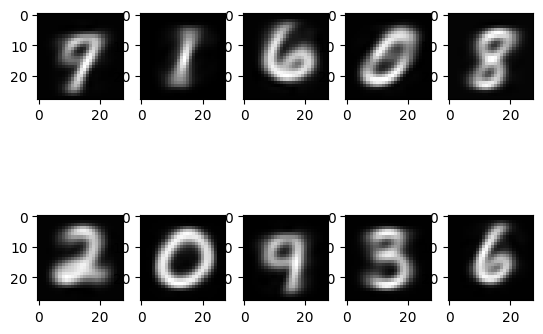

In [ ]:
fig, axes = plt.subplots(2, 5)  # 创建2行5列的子图

for i, ax in enumerate(axes.flat):  # 使用axes.flat遍历所有子图
    X_reconstructed = np.dot(centroids[i].reshape(1, -1), P.T) + np.mean(x_train, axis=0)
    ax.imshow(X_reconstructed.reshape(28, 28).astype('float64'), cmap='gray')

plt.show()

In [ ]:
J

[3322078.6198417195,
 2021018.447383404,
 1950522.1155425822,
 1926991.6154862305,
 1910833.8703655594,
 1902410.129058436,
 1899124.189778232,
 1897638.3959716426,
 1896787.7961546548,
 1896294.1120538758,
 1895982.3653518253,
 1895784.6323401984,
 1895667.4629533552,
 1895579.693712349,
 1895518.434585099,
 1895469.145286723,
 1895416.682508927,
 1895370.0112588166,
 1895325.5717495268,
 1895287.0966633563]

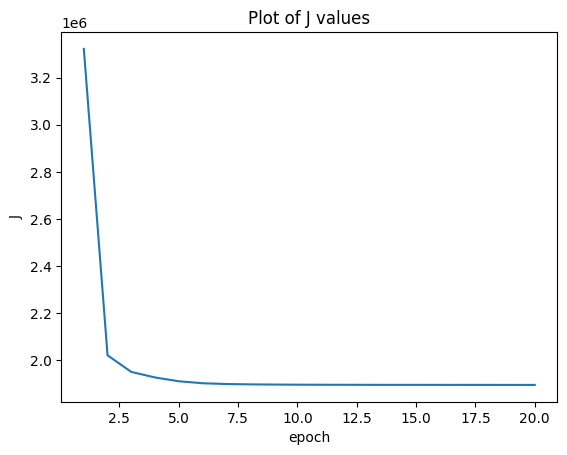

In [180]:
J_x = range(1, len(J) + 1)  # x值为列表的长度
plt.plot(J_x, J)
plt.xlabel('epoch')
plt.ylabel('J')
plt.title('Plot of J values')
plt.savefig('图8.jpg')
plt.show()

聚类标签： [2 0 3 ... 1 3 3]
聚类中心： [[ 1.27931211e+02+0.j  6.03704486e+02+0.j -9.17291685e+01+0.j
   8.91905101e+01+0.j -2.06087652e+01+0.j -6.38555785e+01+0.j
  -2.33342444e+01+0.j -4.12879515e+01+0.j -1.84107513e+01+0.j
   6.32057709e+00+0.j -2.41430511e+01+0.j  5.67995788e+00+0.j
   1.50056074e+01+0.j -8.28645858e+00+0.j -6.04699357e+00+0.j
  -9.28690328e+00+0.j  1.26659959e+01+0.j -2.32456606e+01+0.j
  -5.15241928e+00+0.j -7.59353157e+00+0.j  1.81949558e+01+0.j
   1.20894682e+01+0.j  4.35087520e+00+0.j -1.24679741e+00+0.j
   1.33080817e+01+0.j -1.11736374e+01+0.j  1.17224119e+01+0.j
  -2.06404716e+00+0.j  2.54818430e+00+0.j  4.46931890e+00+0.j
  -3.74196002e+00+0.j -1.61344285e-03+0.j -6.82887911e-01+0.j
   4.68119552e+00+0.j -2.94804396e+00+0.j  6.21279060e-01+0.j
   6.43777157e+00+0.j -6.51571839e-01+0.j -4.33287373e-01+0.j
  -5.35515014e+00+0.j  9.03101908e+00+0.j -3.32217225e-01+0.j
   3.29008107e+00+0.j  1.19336351e+00+0.j  1.15354685e+00+0.j
   6.56384112e-01+0.j  8.04537287e+00+0.

/home/ubuntu/anaconda3/envs/zhc/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  


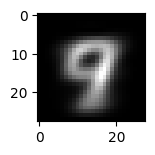

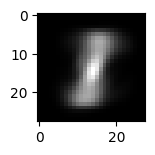

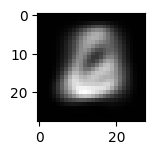

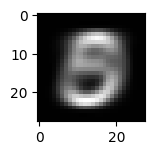

In [34]:
# 生成数据集
np.random.seed(42)
X_pca_train = Y
# 设置聚类中心数量和初始聚类中心
K = 4
initial_centroids = np.array([X_pca_train[1],X_pca_train[3],X_pca_train[5],X_pca_train[7]])
# 运行K均值聚类算法
labels, centroids = k_means_clustering(X_pca_train, K, initial_centroids)

# 打印结果
print("聚类标签：", labels)
print("聚类中心：", centroids)
for i in range(K):
    plt.subplot(1,K,i+1)
    X_reconstructed = np.dot(centroids[i].reshape(1,-1), P.T) + np.mean(x_train, axis=0)
    plt.imshow(X_reconstructed.reshape(28, 28).astype('float64'), cmap='gray')
    plt.show() 

聚类标签： [2 0 4 ... 1 3 3]
聚类中心： [[ 1.29065387e+02+0.j  6.15455844e+02+0.j -7.60265610e+01+0.j
   8.32546895e+01+0.j -6.89231325e+00+0.j -6.18937537e+01+0.j
  -2.72178282e+01+0.j -4.71485159e+01+0.j -1.95577861e+01+0.j
   8.92720049e+00+0.j -2.74383692e+01+0.j  9.06829779e+00+0.j
   1.93757522e+01+0.j -6.14214962e+00+0.j -6.62949650e+00+0.j
  -6.01321512e+00+0.j  1.36831035e+01+0.j -2.48343365e+01+0.j
  -9.05306350e+00+0.j -6.71115207e+00+0.j  2.22365404e+01+0.j
   1.54587604e+01+0.j  3.42945471e+00+0.j -9.42512964e-01+0.j
   1.43083876e+01+0.j -1.27688926e+01+0.j  8.62975405e+00+0.j
  -4.62482345e-01+0.j  2.91822763e+00+0.j  4.70126280e+00+0.j
  -5.81342150e+00+0.j  2.59243646e+00+0.j -2.22468485e+00+0.j
   4.14402743e+00+0.j -2.87405100e+00+0.j  9.31179015e-02+0.j
   7.46041824e+00+0.j -2.66262662e-01+0.j -2.55848710e-01+0.j
  -5.53942994e+00+0.j  1.00349474e+01+0.j -9.69171465e-01+0.j
   3.30503447e+00+0.j  1.76966971e+00+0.j  1.95048265e+00+0.j
   4.92908202e-01+0.j  6.52835750e+00+0.

/home/ubuntu/anaconda3/envs/zhc/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  


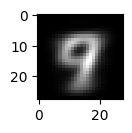

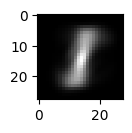

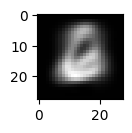

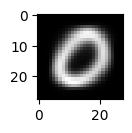

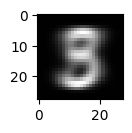

In [37]:
# 生成数据集
np.random.seed(42)
X_pca_train = Y
# 设置聚类中心数量和初始聚类中心
K = 5
initial_centroids = np.array([X_pca_train[1],X_pca_train[3],X_pca_train[5],X_pca_train[7],X_pca_train[9]])
# 运行K均值聚类算法
labels, centroids = k_means_clustering(X_pca_train, K, initial_centroids)

# 打印结果
print("聚类标签：", labels)
print("聚类中心：", centroids)
for i in range(K):
    plt.subplot(1,K,i+1)
    X_reconstructed = np.dot(centroids[i].reshape(1,-1), P.T) + np.mean(x_train, axis=0)
    plt.imshow(X_reconstructed.reshape(28, 28).astype('float64'), cmap='gray')
    plt.show() 

聚类标签： [2 0 5 ... 1 3 3]
聚类中心： [[ 1.97031076e+02+0.j  3.90200549e+02+0.j  2.91109104e+02+0.j
   3.60603132e+02+0.j -2.64978099e+01+0.j -1.57269345e+02+0.j
   7.25991927e+01+0.j  7.90436298e+01+0.j  3.84932336e+01+0.j
   1.93476894e+02+0.j  1.94107790e+01+0.j  9.82875932e+00+0.j
   1.72810975e+01+0.j  2.44629906e+01+0.j  4.26878645e+01+0.j
  -2.77996624e+01+0.j  3.51571533e+01+0.j  1.93667162e+01+0.j
  -3.37122952e+01+0.j -5.21454833e+00+0.j  7.66552111e-01+0.j
   1.65628972e+01+0.j -3.21675905e+01+0.j -7.62735001e+00+0.j
  -1.39830145e+01+0.j -1.54498454e+01+0.j  1.26070614e+01+0.j
  -3.59913241e+00+0.j -2.19230447e+00+0.j  6.88492650e+00+0.j
  -1.92651735e+00+0.j  1.03824680e+01+0.j -1.17654388e+01+0.j
  -6.38329604e+00+0.j -4.67968662e+00+0.j  6.65897792e+00+0.j
  -7.80204326e-01+0.j -3.99242587e+00+0.j -1.61413430e+00+0.j
  -3.19241089e+00+0.j  1.38958350e+01+0.j -2.78335708e+00+0.j
  -4.02143993e+00+0.j  3.66630464e+00+0.j  5.18316792e+00+0.j
   1.38227858e+00+0.j -1.50688650e+00+0.

/home/ubuntu/anaconda3/envs/zhc/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  


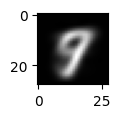

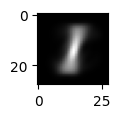

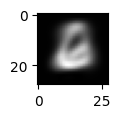

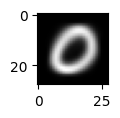

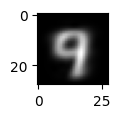

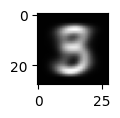

In [38]:
# 生成数据集
np.random.seed(42)
X_pca_train = Y
# 设置聚类中心数量和初始聚类中心
K = 6
initial_centroids = np.array([X_pca_train[1],X_pca_train[3],X_pca_train[5],X_pca_train[7],X_pca_train[9],X_pca_train[11]])
# 运行K均值聚类算法
labels, centroids = k_means_clustering(X_pca_train, K, initial_centroids)

# 打印结果
print("聚类标签：", labels)
print("聚类中心：", centroids)
for i in range(K):
    plt.subplot(1,K,i+1)
    X_reconstructed = np.dot(centroids[i].reshape(1,-1), P.T) + np.mean(x_train, axis=0)
    plt.imshow(X_reconstructed.reshape(28, 28).astype('float64'), cmap='gray')
    plt.show() 

聚类标签： [2 0 5 ... 1 3 3]
聚类中心： [[ 2.62711306e+02+0.j  5.69404259e+02+0.j  2.05205009e+02+0.j
   2.90415434e+02+0.j  3.19741543e+01+0.j -1.68874094e+02+0.j
   1.49072922e+02+0.j  2.99746936e+01+0.j  4.98053320e+01+0.j
   2.52841780e+02+0.j -2.01857440e+01+0.j  1.70651539e+01+0.j
   6.83751281e+01+0.j -1.64277109e+00+0.j  2.36088482e+01+0.j
  -1.13712770e+01+0.j  2.54255195e+01+0.j -1.41808285e-01+0.j
  -3.42954857e+01+0.j -3.00504943e+00+0.j -3.10702480e+01+0.j
   3.66418123e+01+0.j -3.30308537e+01+0.j  4.51373416e+00+0.j
  -1.31832241e+01+0.j -7.74785266e+00+0.j  1.89408190e+01+0.j
  -2.47196782e+00+0.j  1.31093609e+01+0.j  2.00957083e+01+0.j
  -9.39010037e+00+0.j -1.02002730e+01+0.j -9.18329949e+00+0.j
   1.24510870e+00+0.j -1.65405055e+01+0.j  2.04687167e+01+0.j
  -4.21928201e+00+0.j  5.71364195e+00+0.j -5.35805901e+00+0.j
  -1.77017963e+01+0.j  8.26621006e+00+0.j  1.81984995e+00+0.j
  -1.03436177e+01+0.j -1.71032609e+00+0.j  3.89697931e+00+0.j
   7.98686157e+00+0.j  1.48071776e+00+0.

/home/ubuntu/anaconda3/envs/zhc/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  


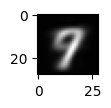

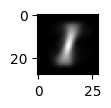

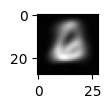

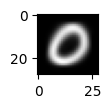

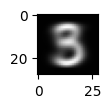

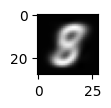

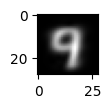

In [39]:
# 生成数据集
np.random.seed(42)
X_pca_train = Y
# 设置聚类中心数量和初始聚类中心
K = 7
initial_centroids = np.array([X_pca_train[1],X_pca_train[3],X_pca_train[5],X_pca_train[7],X_pca_train[9],X_pca_train[11],X_pca_train[13]])
# 运行K均值聚类算法
labels, centroids = k_means_clustering(X_pca_train, K, initial_centroids)

# 打印结果
print("聚类标签：", labels)
print("聚类中心：", centroids)
for i in range(K):
    plt.subplot(1,K,i+1)
    X_reconstructed = np.dot(centroids[i].reshape(1,-1), P.T) + np.mean(x_train, axis=0)
    plt.imshow(X_reconstructed.reshape(28, 28).astype('float64'), cmap='gray')
    plt.show() 

In [40]:
def k_means_clustering(data, k, initial_centroids):
    # 将初始聚类中心设置为当前聚类中心
    centroids = initial_centroids
    
    # 迭代直到收敛
    while True:
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2)) # 计算每个点到所有聚类中心的距离
        labels = np.argmin(distances, axis=0) # 将每个点分配到最近的聚类中心
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)]) # 计算新的聚类中心
        if np.all(centroids == new_centroids):  # 如果聚类中心不再改变，则停止迭代
            break       
        centroids = new_centroids
    
    # 计算目标函数J
    J = np.zeros(k)
    for i in range(k):
        J[i] = np.sum(np.sqrt(((data[labels == i] - centroids[i])**2).sum(axis=1)))
    
    return labels, centroids, J

In [41]:
# 生成数据集
np.random.seed(42)
X_pca_train = Y
# 设置聚类中心数量和初始聚类中心
K = 10
initial_centroids = np.array([X_pca_train[1],X_pca_train[3],X_pca_train[5],X_pca_train[7],X_pca_train[9],X_pca_train[11],X_pca_train[13],X_pca_train[15],X_pca_train[17],X_pca_train[19]])
# 运行K均值聚类算法
labels, centroids, J = k_means_clustering(X_pca_train, K, initial_centroids)

# 打印结果
print("聚类标签：", labels)
print("聚类中心：", centroids)

聚类标签： [2 8 5 ... 7 9 9]
聚类中心： [[ 2.51125147e+02+0.j  6.28861868e+02+0.j -2.44112312e+02+0.j
   1.70887772e+02+0.j -4.54205301e+01+0.j  9.80872863e+01+0.j
   2.78530758e+01+0.j -5.29614184e+01+0.j  3.81768212e+01+0.j
  -1.86459401e+02+0.j -1.50676702e+02+0.j  9.98091047e+01+0.j
   6.92449856e+01+0.j  6.92572393e+01+0.j  4.12676983e+01+0.j
   3.63516345e+01+0.j -2.38872243e+00+0.j  1.13008798e+01+0.j
   1.69725557e+01+0.j  7.86514656e+01+0.j  6.64679329e+01+0.j
  -2.11417562e+01+0.j  6.59486622e+01+0.j  6.92199967e+01+0.j
   1.89980786e+01+0.j -4.81546575e-01+0.j  4.31425112e+01+0.j
  -4.01438606e+00+0.j  2.70809263e+01+0.j -5.52801213e+00+0.j
  -2.37517344e+01+0.j -3.19926202e+01+0.j  1.51783613e+01+0.j
   1.57979387e+01+0.j -4.37186579e+00+0.j -1.28604894e+01+0.j
   1.22855472e+01+0.j  2.45003182e+01+0.j  1.37597610e+01+0.j
   3.16084358e+00+0.j -8.07191925e+00+0.j  1.34564727e+01+0.j
   4.93936195e-02+0.j -1.38744697e+01+0.j -3.15123333e+00+0.j
   2.58929790e+00+0.j  2.78584428e+01+0.

/home/ubuntu/anaconda3/envs/zhc/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [61]:
sum(J)

84043596.84427722

### 对比时间

In [120]:
import time

In [122]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# 定义PCA函数
st = time.time()
pca = PCA(n_components=59, random_state=42)
X_pca = pca.fit_transform(X)
K = 10
initial_centroids = np.array([X_pca_train[1],X_pca_train[3],X_pca_train[5],X_pca_train[7],X_pca_train[2],X_pca_train[0],X_pca_train[-1],X_pca_train[654],X_pca_train[300],X_pca_train[4]])

def k_means_clustering(data, k, initial_centroids):
    kmeans = KMeans(n_clusters=k, init=initial_centroids)
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_, 
    return labels, centroids, inertia
labels, centroids, inertia = k_means_clustering(X_pca, K, initial_centroids)
end = time.time()
print(end-st)

7.514164209365845


In [123]:
def k_means_clustering1(data, k, initial_centroids):
    # 将初始聚类中心设置为当前聚类中心
    centroids = initial_centroids

    while True:
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2)) # 计算每个点到所有聚类中心的距离
        labels = np.argmin(distances, axis=0) # 将每个点分配到最近的聚类中心
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)]) # 计算新的聚类中心
        if np.all(centroids == new_centroids):  # 如果聚类中心不再改变，则停止迭代
            break       
        centroids = new_centroids
      
    return labels, centroids

In [128]:
st = time.time()
np.random.seed(42)
X_pca_train = Y
# 设置聚类中心数量和初始聚类中心
K = 10 
initial_centroids = np.array([X_pca_train[1],X_pca_train[3],X_pca_train[5],X_pca_train[7],X_pca_train[2],X_pca_train[0],X_pca_train[-1],X_pca_train[654],X_pca_train[300],X_pca_train[4]])
labels, centroids = k_means_clustering1(X_pca_train, K, initial_centroids)
ed = time.time()
# 打印结果
print(ed-st)

13.12357473373413


In [130]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import time

# 加载MNIST数据集
mnist = fetch_openml('mnist_784')
# 获取MNIST数据集的图像和标签
X = mnist.data / 255.0
y = mnist.target# 输出数据集的形状
print("X shape:", X.shape)
print("y shape:", y.shape)

# 主成分分析
pca = PCA()
X_pca = pca.fit_transform(X)

# 累计方差贡献率
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# # 输出不同主成分个数下的累计方差贡献率
# for i, ratio in enumerate(cumulative_variance_ratio):
#     print(f"Principal Components: {i+1}, Cumulative Variance Ratio: {ratio}")

# 因子负荷量
loadings = pca.components_

# # 输出因子负荷量
# for i, loading in enumerate(loadings):
#     print(f"Principal Component {i+1} Loadings:")
#     for j, value in enumerate(loading):
#         print(f"Variable {j+1}: {value}")

# 新样本的聚类
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)

# 输出降维前后的聚类结果
print("K-means Clustering Results:")
print("Original Data:")
print(kmeans.labels_)
print("PCA-transformed Data:")
print(kmeans.predict(X_pca))

# 测量聚类算法执行时间
start_time = time.time()
kmeans.fit(X)
end_time = time.time()

execution_time_original = end_time - start_time

start_time = time.time()
kmeans.fit(X_pca)
end_time = time.time()

execution_time_pca = end_time - start_time

print(f"Execution Time (Original Data): {execution_time_original} seconds")
print(f"Execution Time (PCA-transformed Data): {execution_time_pca} seconds")


X shape: (70000, 784)
y shape: (70000,)
K-means Clustering Results:
Original Data:
[0 0 1 ... 1 1 0]
PCA-transformed Data:
[0 0 1 ... 1 1 0]
Execution Time (Original Data): 25.655980587005615 seconds
Execution Time (PCA-transformed Data): 21.7684109210968 seconds
